In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from matplotlib import pyplot as plt
from keras.callbacks import ReduceLROnPlateau
from datetime import datetime
from keras.models import load_model

/home/vinay/PycharmProjects/nn/venv/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df= pd.read_csv('data.csv')
#print(df.head())
df.columns=[['date','onion','chickpeas','potato','rice','sugar','wheat']]
print(df)



       date  onion chickpeas potato   rice  sugar  wheat
0    Jan-00   3.95     17.85   5.55  12.40  14.91  11.38
1    Feb-00   3.00     17.69   4.90  13.00  14.75  11.50
2    Mar-00   2.93     18.50   3.55  12.40  15.20  11.50
3    Apr-00   2.69     19.00   4.53  11.76  15.72  11.50
4    May-00   2.50     18.73   4.77  11.61  15.13  11.07
5    Jun-00   3.20     18.98   5.45  11.30  14.28  11.00
6    Jul-00   5.07     20.43   6.00  11.05  14.86  11.00
7    Aug-00   2.90     21.00   5.52  11.00  15.55  10.90
8    Sep-00   3.24     21.81   5.05  11.00  15.59  10.60
9    Oct-00   5.42     22.11   5.74  10.55  14.76  10.00
10   Nov-00   7.62     25.33   4.24  10.86  14.81  10.00
11   Dec-00   7.89     23.47   4.79  10.89  14.50  10.89
12   Jan-01   7.00     23.05   4.00  11.22  14.49  11.00
13   Feb-01   5.68     22.00   3.26  11.00  14.06  11.00
14   Mar-01   4.71     22.48   3.86  11.00  14.40  11.00
15   Apr-01   3.88     23.00   4.47  10.65  15.26  10.29
16   May-01   3.77     23.77   

In [3]:
month={'Jan':'01','Feb':'02','Mar':'03','Apr':'04','May':'05','Jun':'06','Jul':'07','Aug':'08','Sep':'09','Oct':'10','Nov':'11','Dec':'12'}


In [4]:
def date_x(str):
    X=np.array(df[['date',str]])
    x=[]
    for i in range(X.shape[0]):
        z= '20'+X[i][0][4:]+'-'+month[X[i][0][:3]]+'-01'
        x.append(z)
    datetime.strptime(x[0], '%Y-%m-%d')

    date_x=[]
    for i in range(len(x)):
        date_x.append(datetime.strptime(x[i], '%Y-%m-%d'))
    return date_x

In [5]:
def plotting(str):   
    X=np.array(df[['date',str]])
    x=[]
    for i in range(X.shape[0]):
        z= '20'+X[i][0][4:]+'-'+month[X[i][0][:3]]+'-01'
        x.append(z)
    datetime.strptime(x[0], '%Y-%m-%d')

    date_x=[]
    for i in range(len(x)):
        date_x.append(datetime.strptime(x[i], '%Y-%m-%d'))
    #print(date_x)

    x= np.array(df[str])
    plt.plot(date_x,x[:,0])
    plt.show()

In [6]:
#no of previous prices considered for predicting
t= 30
#no of prices ahead to be predicted 
o=6

In [7]:

def make_dataset(str):

#to form dataset
    X=[]
    Y=[]
    x=np.array(df[str])
    for i in range(x.shape[0]-o-t+1):
        z=[]  
        for j in range(t):
            z.append(x[i+j])
        X.append(z)
        z=[]
        for j in range(o):
            z.append(x[i+t+j])
        Y.append(z)

    X=np.array(X)  
    Y=np.array(Y)
    #print(x)
    #print(Y)        
    X.resize((X.shape[:2]))
    Y.resize((Y.shape[:2]))
    #print(Y.shape)
    #print(X)
    return X,Y


In [8]:
def det_coeff(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )




In [10]:
np.random.seed(10)
X_rice,Y_rice= make_dataset('rice')
train_x,test_x,train_y,test_y= train_test_split(X_rice,Y_rice,test_size=0.2)

model_rice = Sequential()
model_rice.add(Dense(t,input_dim=t,activation='linear'))
model_rice.add(Dense(t*2, activation='relu'))
model_rice.add(Dense(o, activation='linear'))


optimizer = RMSprop(lr=0.0001, rho=0.9, epsilon=1e-08, decay=0.005)
model_rice.compile(optimizer=optimizer, loss='mean_squared_error', metrics=[det_coeff])
history=model_rice.fit(train_x, train_y, epochs=200, verbose=2, validation_data=(test_x, test_y))



Train on 146 samples, validate on 37 samples
Epoch 1/200
 - 9s - loss: 833.3894 - det_coeff: -1.0475e+01 - val_loss: 697.8155 - val_det_coeff: -9.8668e+00
Epoch 2/200
 - 0s - loss: 722.7206 - det_coeff: -8.8807e+00 - val_loss: 628.2309 - val_det_coeff: -8.7834e+00
Epoch 3/200
 - 0s - loss: 652.0343 - det_coeff: -7.9174e+00 - val_loss: 572.5355 - val_det_coeff: -7.9163e+00
Epoch 4/200
 - 0s - loss: 593.9927 - det_coeff: -7.2551e+00 - val_loss: 524.3001 - val_det_coeff: -7.1653e+00
Epoch 5/200
 - 0s - loss: 542.7257 - det_coeff: -6.4323e+00 - val_loss: 480.5864 - val_det_coeff: -6.4849e+00
Epoch 6/200
 - 0s - loss: 495.8983 - det_coeff: -5.8156e+00 - val_loss: 440.4634 - val_det_coeff: -5.8603e+00
Epoch 7/200
 - 0s - loss: 453.0748 - det_coeff: -5.2285e+00 - val_loss: 403.3809 - val_det_coeff: -5.2827e+00
Epoch 8/200
 - 0s - loss: 413.0810 - det_coeff: -4.9185e+00 - val_loss: 368.5026 - val_det_coeff: -4.7395e+00
Epoch 9/200
 - 0s - loss: 375.6698 - det_coeff: -4.2148e+00 - val_loss: 336

Epoch 82/200
 - 0s - loss: 8.2665 - det_coeff: 0.8825 - val_loss: 7.3092 - val_det_coeff: 0.8845
Epoch 83/200
 - 0s - loss: 8.2278 - det_coeff: 0.8886 - val_loss: 7.3036 - val_det_coeff: 0.8846
Epoch 84/200
 - 0s - loss: 8.2466 - det_coeff: 0.8820 - val_loss: 7.2528 - val_det_coeff: 0.8853
Epoch 85/200
 - 0s - loss: 8.1801 - det_coeff: 0.8881 - val_loss: 7.2811 - val_det_coeff: 0.8849
Epoch 86/200
 - 0s - loss: 8.1360 - det_coeff: 0.8898 - val_loss: 7.2677 - val_det_coeff: 0.8851
Epoch 87/200
 - 0s - loss: 8.2113 - det_coeff: 0.8857 - val_loss: 7.2798 - val_det_coeff: 0.8849
Epoch 88/200
 - 0s - loss: 8.1079 - det_coeff: 0.8905 - val_loss: 7.3088 - val_det_coeff: 0.8845
Epoch 89/200
 - 0s - loss: 8.1092 - det_coeff: 0.8890 - val_loss: 7.2863 - val_det_coeff: 0.8849
Epoch 90/200
 - 0s - loss: 8.1361 - det_coeff: 0.8860 - val_loss: 7.1708 - val_det_coeff: 0.8867
Epoch 91/200
 - 0s - loss: 8.0531 - det_coeff: 0.8872 - val_loss: 7.1404 - val_det_coeff: 0.8871
Epoch 92/200
 - 0s - loss: 8.0

Epoch 166/200
 - 0s - loss: 7.1051 - det_coeff: 0.9034 - val_loss: 6.2899 - val_det_coeff: 0.9008
Epoch 167/200
 - 0s - loss: 7.0699 - det_coeff: 0.9009 - val_loss: 6.2151 - val_det_coeff: 0.9020
Epoch 168/200
 - 0s - loss: 7.0856 - det_coeff: 0.9032 - val_loss: 6.2630 - val_det_coeff: 0.9012
Epoch 169/200
 - 0s - loss: 7.0691 - det_coeff: 0.8998 - val_loss: 6.2562 - val_det_coeff: 0.9013
Epoch 170/200
 - 0s - loss: 7.0619 - det_coeff: 0.9012 - val_loss: 6.2221 - val_det_coeff: 0.9019
Epoch 171/200
 - 0s - loss: 7.0325 - det_coeff: 0.8986 - val_loss: 6.1946 - val_det_coeff: 0.9023
Epoch 172/200
 - 0s - loss: 7.0303 - det_coeff: 0.9046 - val_loss: 6.2243 - val_det_coeff: 0.9018
Epoch 173/200
 - 0s - loss: 7.0241 - det_coeff: 0.9046 - val_loss: 6.2768 - val_det_coeff: 0.9010
Epoch 174/200
 - 0s - loss: 7.0154 - det_coeff: 0.9001 - val_loss: 6.2082 - val_det_coeff: 0.9021
Epoch 175/200
 - 0s - loss: 7.0062 - det_coeff: 0.9033 - val_loss: 6.2440 - val_det_coeff: 0.9015
Epoch 176/200
 - 0s 

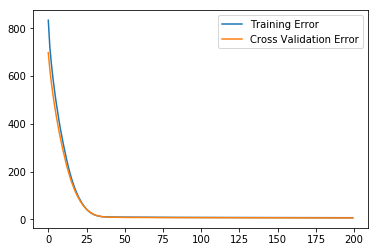

In [11]:
plt.plot(history.history['loss'],label='Training Error')
plt.plot(history.history['val_loss'],label='Cross Validation Error')
plt.legend()
plt.show()

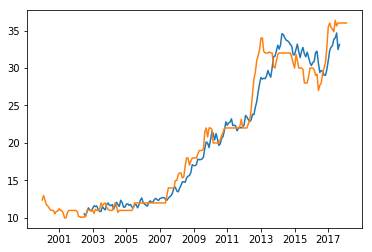

In [12]:
predictions= model_rice.predict(X_rice)
if o!=1:
    plt.plot(date_x('rice')[t:-o+1],predictions[:,0])
else:
    plt.plot(date_x('rice')[t:],predictions)
   
plotting('rice')
plt.show()


In [13]:
#predicting 

#crop=input("enter crop for which you would like to know prices")

X= np.array(df['rice'])
x= X[-t:]
print(x.shape)
x.resize((1,30))
print(x.shape)
predictions=model_rice.predict(x)
print(predictions)


(30, 1)
(1, 30)
[[36.416245 35.71937  35.03889  37.030117 34.992176 35.584488]]


In [14]:
model_rice.save('rice.h5')

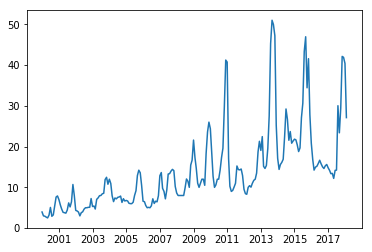

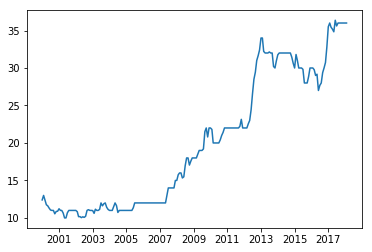

In [15]:
plotting('onion')
plotting('rice')

In [13]:
X_onion,Y_onion= make_dataset('onion')
train_x,test_x,train_y,test_y= train_test_split(X_onion,Y_onion,test_size=0.2)
print(train_x.shape)
print(train_y.shape)

(146, 30)
(146, 6)


In [16]:
np.random.seed(16)
X_onion,Y_onion= make_dataset('onion')
train_x,test_x,train_y,test_y= train_test_split(X_onion,Y_onion,test_size=0.2)
model_onion = Sequential()
model_onion.add(Dense(t,input_dim=t))
model_onion.add(Dense(t+1, activation='relu'))
#model_onion.add(Dense(t+1, activation='relu'))
model_onion.add(Dense(o, activation='linear'))

optimizer = RMSprop(lr=0.0039, rho=0.9, epsilon=1e-08, decay=0.005)
model_onion.compile(optimizer=optimizer, loss='mean_squared_error', metrics=[det_coeff])
history=model_onion.fit(train_x, train_y, epochs=2000, verbose=2, validation_data=(test_x, test_y))



Train on 146 samples, validate on 37 samples
Epoch 1/2000
 - 0s - loss: 343.2868 - det_coeff: -4.8762e+00 - val_loss: 131.1603 - val_det_coeff: 0.0990
Epoch 2/2000
 - 0s - loss: 89.9935 - det_coeff: -1.9329e-01 - val_loss: 95.2196 - val_det_coeff: 0.3465
Epoch 3/2000
 - 0s - loss: 72.8709 - det_coeff: -9.9084e-04 - val_loss: 91.3357 - val_det_coeff: 0.3739
Epoch 4/2000
 - 0s - loss: 58.1676 - det_coeff: 0.2318 - val_loss: 87.9090 - val_det_coeff: 0.3972
Epoch 5/2000
 - 0s - loss: 53.6185 - det_coeff: 0.2746 - val_loss: 86.0067 - val_det_coeff: 0.4101
Epoch 6/2000
 - 0s - loss: 48.6592 - det_coeff: 0.3526 - val_loss: 75.8309 - val_det_coeff: 0.4807
Epoch 7/2000
 - 0s - loss: 63.1814 - det_coeff: 0.1575 - val_loss: 90.7137 - val_det_coeff: 0.3783
Epoch 8/2000
 - 0s - loss: 49.4631 - det_coeff: 0.3483 - val_loss: 78.4515 - val_det_coeff: 0.4623
Epoch 9/2000
 - 0s - loss: 56.4558 - det_coeff: 0.2319 - val_loss: 73.7721 - val_det_coeff: 0.4946
Epoch 10/2000
 - 0s - loss: 46.5926 - det_coeff

Epoch 83/2000
 - 0s - loss: 16.3318 - det_coeff: 0.7467 - val_loss: 53.0025 - val_det_coeff: 0.6358
Epoch 84/2000
 - 0s - loss: 18.6457 - det_coeff: 0.7407 - val_loss: 44.1078 - val_det_coeff: 0.6972
Epoch 85/2000
 - 0s - loss: 16.2363 - det_coeff: 0.7829 - val_loss: 44.8241 - val_det_coeff: 0.6923
Epoch 86/2000
 - 0s - loss: 17.1134 - det_coeff: 0.7604 - val_loss: 43.6575 - val_det_coeff: 0.7009
Epoch 87/2000
 - 0s - loss: 18.1463 - det_coeff: 0.7482 - val_loss: 47.1223 - val_det_coeff: 0.6763
Epoch 88/2000
 - 0s - loss: 16.6636 - det_coeff: 0.7788 - val_loss: 40.1380 - val_det_coeff: 0.7248
Epoch 89/2000
 - 0s - loss: 16.5542 - det_coeff: 0.7812 - val_loss: 49.8428 - val_det_coeff: 0.6574
Epoch 90/2000
 - 0s - loss: 16.8131 - det_coeff: 0.7709 - val_loss: 49.4916 - val_det_coeff: 0.6597
Epoch 91/2000
 - 0s - loss: 16.6054 - det_coeff: 0.7686 - val_loss: 45.4350 - val_det_coeff: 0.6877
Epoch 92/2000
 - 0s - loss: 16.1560 - det_coeff: 0.7710 - val_loss: 41.9919 - val_det_coeff: 0.7122


Epoch 165/2000
 - 0s - loss: 11.2508 - det_coeff: 0.8450 - val_loss: 35.0021 - val_det_coeff: 0.7600
Epoch 166/2000
 - 0s - loss: 11.1064 - det_coeff: 0.8463 - val_loss: 36.6886 - val_det_coeff: 0.7481
Epoch 167/2000
 - 0s - loss: 10.9447 - det_coeff: 0.8325 - val_loss: 34.6670 - val_det_coeff: 0.7622
Epoch 168/2000
 - 0s - loss: 11.2739 - det_coeff: 0.8424 - val_loss: 34.2868 - val_det_coeff: 0.7649
Epoch 169/2000
 - 0s - loss: 12.0827 - det_coeff: 0.8422 - val_loss: 34.2560 - val_det_coeff: 0.7652
Epoch 170/2000
 - 0s - loss: 11.2541 - det_coeff: 0.8418 - val_loss: 34.5851 - val_det_coeff: 0.7628
Epoch 171/2000
 - 0s - loss: 10.9292 - det_coeff: 0.8443 - val_loss: 35.1042 - val_det_coeff: 0.7590
Epoch 172/2000
 - 0s - loss: 10.8793 - det_coeff: 0.8541 - val_loss: 33.6269 - val_det_coeff: 0.7692
Epoch 173/2000
 - 0s - loss: 11.7161 - det_coeff: 0.8418 - val_loss: 35.9416 - val_det_coeff: 0.7529
Epoch 174/2000
 - 0s - loss: 11.2340 - det_coeff: 0.8520 - val_loss: 34.7422 - val_det_coef

Epoch 247/2000
 - 0s - loss: 9.2962 - det_coeff: 0.8619 - val_loss: 33.0381 - val_det_coeff: 0.7734
Epoch 248/2000
 - 0s - loss: 9.0674 - det_coeff: 0.8650 - val_loss: 33.1453 - val_det_coeff: 0.7727
Epoch 249/2000
 - 0s - loss: 9.0756 - det_coeff: 0.8577 - val_loss: 33.1752 - val_det_coeff: 0.7725
Epoch 250/2000
 - 0s - loss: 9.3266 - det_coeff: 0.8439 - val_loss: 33.7671 - val_det_coeff: 0.7685
Epoch 251/2000
 - 0s - loss: 9.2760 - det_coeff: 0.8681 - val_loss: 32.8676 - val_det_coeff: 0.7747
Epoch 252/2000
 - 0s - loss: 9.0922 - det_coeff: 0.8736 - val_loss: 33.2996 - val_det_coeff: 0.7715
Epoch 253/2000
 - 0s - loss: 9.4623 - det_coeff: 0.8616 - val_loss: 32.0249 - val_det_coeff: 0.7804
Epoch 254/2000
 - 0s - loss: 9.7501 - det_coeff: 0.8667 - val_loss: 31.5604 - val_det_coeff: 0.7836
Epoch 255/2000
 - 0s - loss: 9.0432 - det_coeff: 0.8583 - val_loss: 32.9092 - val_det_coeff: 0.7742
Epoch 256/2000
 - 0s - loss: 9.0347 - det_coeff: 0.8682 - val_loss: 32.2977 - val_det_coeff: 0.7785


Epoch 329/2000
 - 0s - loss: 8.3452 - det_coeff: 0.8810 - val_loss: 32.1812 - val_det_coeff: 0.7793
Epoch 330/2000
 - 0s - loss: 8.0735 - det_coeff: 0.8843 - val_loss: 31.9373 - val_det_coeff: 0.7810
Epoch 331/2000
 - 0s - loss: 8.3219 - det_coeff: 0.8901 - val_loss: 31.9256 - val_det_coeff: 0.7812
Epoch 332/2000
 - 0s - loss: 8.4619 - det_coeff: 0.8885 - val_loss: 33.3474 - val_det_coeff: 0.7712
Epoch 333/2000
 - 0s - loss: 8.1321 - det_coeff: 0.8878 - val_loss: 32.2386 - val_det_coeff: 0.7789
Epoch 334/2000
 - 0s - loss: 8.0786 - det_coeff: 0.8944 - val_loss: 32.4278 - val_det_coeff: 0.7776
Epoch 335/2000
 - 0s - loss: 8.0956 - det_coeff: 0.8919 - val_loss: 32.5391 - val_det_coeff: 0.7767
Epoch 336/2000
 - 0s - loss: 8.2688 - det_coeff: 0.8874 - val_loss: 33.0538 - val_det_coeff: 0.7733
Epoch 337/2000
 - 0s - loss: 8.1800 - det_coeff: 0.8911 - val_loss: 32.5492 - val_det_coeff: 0.7768
Epoch 338/2000
 - 0s - loss: 8.0518 - det_coeff: 0.8866 - val_loss: 32.3425 - val_det_coeff: 0.7783


Epoch 411/2000
 - 0s - loss: 7.2778 - det_coeff: 0.8996 - val_loss: 33.2020 - val_det_coeff: 0.7723
Epoch 412/2000
 - 0s - loss: 7.4395 - det_coeff: 0.8941 - val_loss: 32.6366 - val_det_coeff: 0.7763
Epoch 413/2000
 - 0s - loss: 7.4651 - det_coeff: 0.8835 - val_loss: 33.4076 - val_det_coeff: 0.7709
Epoch 414/2000
 - 0s - loss: 7.4602 - det_coeff: 0.8718 - val_loss: 33.1899 - val_det_coeff: 0.7725
Epoch 415/2000
 - 0s - loss: 7.2129 - det_coeff: 0.9003 - val_loss: 32.6141 - val_det_coeff: 0.7764
Epoch 416/2000
 - 0s - loss: 7.2212 - det_coeff: 0.9042 - val_loss: 33.4473 - val_det_coeff: 0.7706
Epoch 417/2000
 - 0s - loss: 7.5588 - det_coeff: 0.8851 - val_loss: 32.5486 - val_det_coeff: 0.7770
Epoch 418/2000
 - 0s - loss: 7.2064 - det_coeff: 0.9013 - val_loss: 33.0791 - val_det_coeff: 0.7732
Epoch 419/2000
 - 0s - loss: 7.3255 - det_coeff: 0.8952 - val_loss: 32.0708 - val_det_coeff: 0.7802
Epoch 420/2000
 - 0s - loss: 7.4181 - det_coeff: 0.8978 - val_loss: 31.6814 - val_det_coeff: 0.7828


Epoch 493/2000
 - 0s - loss: 6.8689 - det_coeff: 0.9000 - val_loss: 32.1945 - val_det_coeff: 0.7794
Epoch 494/2000
 - 0s - loss: 6.7831 - det_coeff: 0.9017 - val_loss: 32.8142 - val_det_coeff: 0.7751
Epoch 495/2000
 - 0s - loss: 6.6709 - det_coeff: 0.9083 - val_loss: 31.7010 - val_det_coeff: 0.7828
Epoch 496/2000
 - 0s - loss: 6.8184 - det_coeff: 0.9081 - val_loss: 32.3888 - val_det_coeff: 0.7781
Epoch 497/2000
 - 0s - loss: 6.7527 - det_coeff: 0.9110 - val_loss: 32.4163 - val_det_coeff: 0.7779
Epoch 498/2000
 - 0s - loss: 6.7345 - det_coeff: 0.8955 - val_loss: 31.8140 - val_det_coeff: 0.7820
Epoch 499/2000
 - 0s - loss: 6.7885 - det_coeff: 0.9092 - val_loss: 31.8831 - val_det_coeff: 0.7815
Epoch 500/2000
 - 0s - loss: 6.8486 - det_coeff: 0.9011 - val_loss: 32.7140 - val_det_coeff: 0.7758
Epoch 501/2000
 - 0s - loss: 6.6205 - det_coeff: 0.9100 - val_loss: 32.8733 - val_det_coeff: 0.7747
Epoch 502/2000
 - 0s - loss: 6.6611 - det_coeff: 0.8935 - val_loss: 32.5697 - val_det_coeff: 0.7768


Epoch 575/2000
 - 0s - loss: 6.3339 - det_coeff: 0.9002 - val_loss: 31.9764 - val_det_coeff: 0.7809
Epoch 576/2000
 - 0s - loss: 6.2858 - det_coeff: 0.9155 - val_loss: 32.0976 - val_det_coeff: 0.7801
Epoch 577/2000
 - 0s - loss: 6.3433 - det_coeff: 0.9115 - val_loss: 32.2214 - val_det_coeff: 0.7793
Epoch 578/2000
 - 0s - loss: 6.2502 - det_coeff: 0.9015 - val_loss: 33.2686 - val_det_coeff: 0.7720
Epoch 579/2000
 - 0s - loss: 6.3332 - det_coeff: 0.9117 - val_loss: 32.6828 - val_det_coeff: 0.7761
Epoch 580/2000
 - 0s - loss: 6.2953 - det_coeff: 0.9182 - val_loss: 32.3235 - val_det_coeff: 0.7785
Epoch 581/2000
 - 0s - loss: 6.2045 - det_coeff: 0.9091 - val_loss: 32.6755 - val_det_coeff: 0.7761
Epoch 582/2000
 - 0s - loss: 6.2743 - det_coeff: 0.8945 - val_loss: 32.5859 - val_det_coeff: 0.7768
Epoch 583/2000
 - 0s - loss: 6.3918 - det_coeff: 0.9054 - val_loss: 33.5231 - val_det_coeff: 0.7702
Epoch 584/2000
 - 0s - loss: 6.3205 - det_coeff: 0.9147 - val_loss: 32.9236 - val_det_coeff: 0.7744


Epoch 657/2000
 - 0s - loss: 5.9186 - det_coeff: 0.9168 - val_loss: 33.1141 - val_det_coeff: 0.7731
Epoch 658/2000
 - 0s - loss: 5.8727 - det_coeff: 0.9219 - val_loss: 33.1668 - val_det_coeff: 0.7727
Epoch 659/2000
 - 0s - loss: 5.9221 - det_coeff: 0.9118 - val_loss: 33.3305 - val_det_coeff: 0.7717
Epoch 660/2000
 - 0s - loss: 5.9445 - det_coeff: 0.9210 - val_loss: 32.7198 - val_det_coeff: 0.7759
Epoch 661/2000
 - 0s - loss: 6.1470 - det_coeff: 0.9131 - val_loss: 32.7554 - val_det_coeff: 0.7756
Epoch 662/2000
 - 0s - loss: 5.8765 - det_coeff: 0.9178 - val_loss: 32.7213 - val_det_coeff: 0.7758
Epoch 663/2000
 - 0s - loss: 5.8556 - det_coeff: 0.9121 - val_loss: 32.8429 - val_det_coeff: 0.7750
Epoch 664/2000
 - 0s - loss: 5.9254 - det_coeff: 0.9205 - val_loss: 32.5667 - val_det_coeff: 0.7768
Epoch 665/2000
 - 0s - loss: 5.8836 - det_coeff: 0.9215 - val_loss: 33.2586 - val_det_coeff: 0.7721
Epoch 666/2000
 - 0s - loss: 5.8537 - det_coeff: 0.9203 - val_loss: 32.7961 - val_det_coeff: 0.7753


Epoch 739/2000
 - 0s - loss: 5.6102 - det_coeff: 0.9228 - val_loss: 32.3955 - val_det_coeff: 0.7781
Epoch 740/2000
 - 0s - loss: 5.6519 - det_coeff: 0.9200 - val_loss: 33.0288 - val_det_coeff: 0.7737
Epoch 741/2000
 - 0s - loss: 5.6535 - det_coeff: 0.9218 - val_loss: 33.0373 - val_det_coeff: 0.7737
Epoch 742/2000
 - 0s - loss: 5.6493 - det_coeff: 0.9263 - val_loss: 33.1004 - val_det_coeff: 0.7732
Epoch 743/2000
 - 0s - loss: 5.5820 - det_coeff: 0.9160 - val_loss: 33.5620 - val_det_coeff: 0.7700
Epoch 744/2000
 - 0s - loss: 5.7183 - det_coeff: 0.9207 - val_loss: 33.1891 - val_det_coeff: 0.7726
Epoch 745/2000
 - 0s - loss: 5.6173 - det_coeff: 0.9155 - val_loss: 32.7761 - val_det_coeff: 0.7754
Epoch 746/2000
 - 0s - loss: 5.6422 - det_coeff: 0.9182 - val_loss: 32.6025 - val_det_coeff: 0.7767
Epoch 747/2000
 - 0s - loss: 5.6579 - det_coeff: 0.9139 - val_loss: 33.0041 - val_det_coeff: 0.7739
Epoch 748/2000
 - 0s - loss: 5.6261 - det_coeff: 0.9228 - val_loss: 33.4263 - val_det_coeff: 0.7710


Epoch 821/2000
 - 0s - loss: 5.3955 - det_coeff: 0.9293 - val_loss: 32.7248 - val_det_coeff: 0.7758
Epoch 822/2000
 - 0s - loss: 5.3840 - det_coeff: 0.9259 - val_loss: 32.8487 - val_det_coeff: 0.7750
Epoch 823/2000
 - 0s - loss: 5.4445 - det_coeff: 0.9272 - val_loss: 33.2968 - val_det_coeff: 0.7719
Epoch 824/2000
 - 0s - loss: 5.3916 - det_coeff: 0.9264 - val_loss: 32.6526 - val_det_coeff: 0.7763
Epoch 825/2000
 - 0s - loss: 5.3557 - det_coeff: 0.9255 - val_loss: 32.4904 - val_det_coeff: 0.7774
Epoch 826/2000
 - 0s - loss: 5.4089 - det_coeff: 0.9195 - val_loss: 32.7558 - val_det_coeff: 0.7756
Epoch 827/2000
 - 0s - loss: 5.3771 - det_coeff: 0.9214 - val_loss: 33.4908 - val_det_coeff: 0.7706
Epoch 828/2000
 - 0s - loss: 5.3837 - det_coeff: 0.9202 - val_loss: 32.6567 - val_det_coeff: 0.7763
Epoch 829/2000
 - 0s - loss: 5.3411 - det_coeff: 0.9224 - val_loss: 32.6537 - val_det_coeff: 0.7763
Epoch 830/2000
 - 0s - loss: 5.4806 - det_coeff: 0.9234 - val_loss: 33.4926 - val_det_coeff: 0.7705


Epoch 903/2000
 - 0s - loss: 5.2165 - det_coeff: 0.9144 - val_loss: 32.7966 - val_det_coeff: 0.7753
Epoch 904/2000
 - 0s - loss: 5.1943 - det_coeff: 0.9100 - val_loss: 33.2810 - val_det_coeff: 0.7720
Epoch 905/2000
 - 0s - loss: 5.1829 - det_coeff: 0.9318 - val_loss: 33.0530 - val_det_coeff: 0.7736
Epoch 906/2000
 - 0s - loss: 5.1650 - det_coeff: 0.9293 - val_loss: 32.9033 - val_det_coeff: 0.7746
Epoch 907/2000
 - 0s - loss: 5.2022 - det_coeff: 0.9314 - val_loss: 33.0441 - val_det_coeff: 0.7736
Epoch 908/2000
 - 0s - loss: 5.1656 - det_coeff: 0.9235 - val_loss: 33.1053 - val_det_coeff: 0.7732
Epoch 909/2000
 - 0s - loss: 5.1961 - det_coeff: 0.9195 - val_loss: 32.9557 - val_det_coeff: 0.7742
Epoch 910/2000
 - 0s - loss: 5.2038 - det_coeff: 0.9297 - val_loss: 33.2541 - val_det_coeff: 0.7722
Epoch 911/2000
 - 0s - loss: 5.2383 - det_coeff: 0.9278 - val_loss: 32.8295 - val_det_coeff: 0.7751
Epoch 912/2000
 - 0s - loss: 5.1651 - det_coeff: 0.9307 - val_loss: 32.9642 - val_det_coeff: 0.7742


Epoch 985/2000
 - 0s - loss: 5.0123 - det_coeff: 0.9246 - val_loss: 33.0849 - val_det_coeff: 0.7733
Epoch 986/2000
 - 0s - loss: 5.1151 - det_coeff: 0.9291 - val_loss: 33.0609 - val_det_coeff: 0.7735
Epoch 987/2000
 - 0s - loss: 5.0659 - det_coeff: 0.9315 - val_loss: 32.8937 - val_det_coeff: 0.7747
Epoch 988/2000
 - 0s - loss: 5.0034 - det_coeff: 0.9294 - val_loss: 32.7072 - val_det_coeff: 0.7759
Epoch 989/2000
 - 0s - loss: 4.9995 - det_coeff: 0.9258 - val_loss: 32.9883 - val_det_coeff: 0.7740
Epoch 990/2000
 - 0s - loss: 4.9780 - det_coeff: 0.9337 - val_loss: 32.9658 - val_det_coeff: 0.7742
Epoch 991/2000
 - 0s - loss: 5.0199 - det_coeff: 0.9337 - val_loss: 32.8066 - val_det_coeff: 0.7752
Epoch 992/2000
 - 0s - loss: 5.0124 - det_coeff: 0.9328 - val_loss: 33.1165 - val_det_coeff: 0.7731
Epoch 993/2000
 - 0s - loss: 4.9932 - det_coeff: 0.9257 - val_loss: 32.6882 - val_det_coeff: 0.7761
Epoch 994/2000
 - 0s - loss: 5.0050 - det_coeff: 0.9240 - val_loss: 32.9420 - val_det_coeff: 0.7744


Epoch 1067/2000
 - 0s - loss: 4.8636 - det_coeff: 0.9352 - val_loss: 32.9967 - val_det_coeff: 0.7739
Epoch 1068/2000
 - 0s - loss: 4.8979 - det_coeff: 0.9316 - val_loss: 33.0090 - val_det_coeff: 0.7739
Epoch 1069/2000
 - 0s - loss: 4.8473 - det_coeff: 0.9298 - val_loss: 32.6098 - val_det_coeff: 0.7766
Epoch 1070/2000
 - 0s - loss: 4.8891 - det_coeff: 0.9336 - val_loss: 32.8656 - val_det_coeff: 0.7748
Epoch 1071/2000
 - 0s - loss: 4.9107 - det_coeff: 0.9339 - val_loss: 32.9842 - val_det_coeff: 0.7740
Epoch 1072/2000
 - 0s - loss: 4.8741 - det_coeff: 0.9323 - val_loss: 33.1710 - val_det_coeff: 0.7727
Epoch 1073/2000
 - 0s - loss: 4.8623 - det_coeff: 0.9264 - val_loss: 33.0570 - val_det_coeff: 0.7735
Epoch 1074/2000
 - 0s - loss: 4.8943 - det_coeff: 0.9280 - val_loss: 32.9412 - val_det_coeff: 0.7744
Epoch 1075/2000
 - 0s - loss: 4.8407 - det_coeff: 0.9305 - val_loss: 32.9995 - val_det_coeff: 0.7739
Epoch 1076/2000
 - 0s - loss: 4.8729 - det_coeff: 0.9322 - val_loss: 32.9476 - val_det_coef

 - 0s - loss: 4.7622 - det_coeff: 0.9235 - val_loss: 32.9517 - val_det_coeff: 0.7743
Epoch 1149/2000
 - 0s - loss: 4.7713 - det_coeff: 0.9371 - val_loss: 33.1150 - val_det_coeff: 0.7731
Epoch 1150/2000
 - 0s - loss: 4.7644 - det_coeff: 0.9352 - val_loss: 33.1243 - val_det_coeff: 0.7731
Epoch 1151/2000
 - 0s - loss: 4.7780 - det_coeff: 0.9308 - val_loss: 32.5243 - val_det_coeff: 0.7772
Epoch 1152/2000
 - 0s - loss: 4.7206 - det_coeff: 0.9326 - val_loss: 32.8604 - val_det_coeff: 0.7748
Epoch 1153/2000
 - 0s - loss: 4.7422 - det_coeff: 0.9345 - val_loss: 32.7920 - val_det_coeff: 0.7753
Epoch 1154/2000
 - 0s - loss: 4.7634 - det_coeff: 0.9303 - val_loss: 33.2977 - val_det_coeff: 0.7719
Epoch 1155/2000
 - 0s - loss: 4.7357 - det_coeff: 0.9372 - val_loss: 32.8384 - val_det_coeff: 0.7750
Epoch 1156/2000
 - 0s - loss: 4.7853 - det_coeff: 0.9346 - val_loss: 32.8490 - val_det_coeff: 0.7750
Epoch 1157/2000
 - 0s - loss: 4.7223 - det_coeff: 0.9328 - val_loss: 32.9533 - val_det_coeff: 0.7742
Epoch 

Epoch 1230/2000
 - 0s - loss: 4.6318 - det_coeff: 0.9359 - val_loss: 32.9410 - val_det_coeff: 0.7743
Epoch 1231/2000
 - 0s - loss: 4.6405 - det_coeff: 0.9353 - val_loss: 33.0803 - val_det_coeff: 0.7734
Epoch 1232/2000
 - 0s - loss: 4.6440 - det_coeff: 0.9309 - val_loss: 33.0124 - val_det_coeff: 0.7738
Epoch 1233/2000
 - 0s - loss: 4.6392 - det_coeff: 0.9387 - val_loss: 33.1194 - val_det_coeff: 0.7731
Epoch 1234/2000
 - 0s - loss: 4.6256 - det_coeff: 0.9254 - val_loss: 33.2237 - val_det_coeff: 0.7724
Epoch 1235/2000
 - 0s - loss: 4.6435 - det_coeff: 0.9365 - val_loss: 32.9010 - val_det_coeff: 0.7746
Epoch 1236/2000
 - 0s - loss: 4.6467 - det_coeff: 0.9311 - val_loss: 32.9223 - val_det_coeff: 0.7744
Epoch 1237/2000
 - 0s - loss: 4.6221 - det_coeff: 0.9394 - val_loss: 33.4359 - val_det_coeff: 0.7709
Epoch 1238/2000
 - 0s - loss: 4.6582 - det_coeff: 0.9344 - val_loss: 32.9330 - val_det_coeff: 0.7743
Epoch 1239/2000
 - 0s - loss: 4.6442 - det_coeff: 0.9372 - val_loss: 32.7987 - val_det_coef

 - 0s - loss: 4.5213 - det_coeff: 0.9360 - val_loss: 33.1141 - val_det_coeff: 0.7731
Epoch 1312/2000
 - 0s - loss: 4.5244 - det_coeff: 0.9397 - val_loss: 33.3946 - val_det_coeff: 0.7712
Epoch 1313/2000
 - 0s - loss: 4.5595 - det_coeff: 0.9371 - val_loss: 33.4113 - val_det_coeff: 0.7711
Epoch 1314/2000
 - 0s - loss: 4.5232 - det_coeff: 0.9360 - val_loss: 33.0130 - val_det_coeff: 0.7738
Epoch 1315/2000
 - 0s - loss: 4.5096 - det_coeff: 0.9398 - val_loss: 33.1372 - val_det_coeff: 0.7730
Epoch 1316/2000
 - 0s - loss: 4.5195 - det_coeff: 0.9363 - val_loss: 32.9946 - val_det_coeff: 0.7739
Epoch 1317/2000
 - 0s - loss: 4.5315 - det_coeff: 0.9328 - val_loss: 33.3166 - val_det_coeff: 0.7717
Epoch 1318/2000
 - 0s - loss: 4.5369 - det_coeff: 0.9341 - val_loss: 33.1723 - val_det_coeff: 0.7727
Epoch 1319/2000
 - 0s - loss: 4.5083 - det_coeff: 0.9403 - val_loss: 33.2204 - val_det_coeff: 0.7724
Epoch 1320/2000
 - 0s - loss: 4.5326 - det_coeff: 0.9342 - val_loss: 33.1104 - val_det_coeff: 0.7732
Epoch 

Epoch 1393/2000
 - 0s - loss: 4.4637 - det_coeff: 0.9387 - val_loss: 33.2514 - val_det_coeff: 0.7722
Epoch 1394/2000
 - 0s - loss: 4.4286 - det_coeff: 0.9358 - val_loss: 33.3312 - val_det_coeff: 0.7717
Epoch 1395/2000
 - 0s - loss: 4.4595 - det_coeff: 0.9397 - val_loss: 33.2150 - val_det_coeff: 0.7724
Epoch 1396/2000
 - 0s - loss: 4.4413 - det_coeff: 0.9320 - val_loss: 33.0077 - val_det_coeff: 0.7738
Epoch 1397/2000
 - 0s - loss: 4.4377 - det_coeff: 0.9411 - val_loss: 32.8927 - val_det_coeff: 0.7746
Epoch 1398/2000
 - 0s - loss: 4.4408 - det_coeff: 0.9397 - val_loss: 33.1852 - val_det_coeff: 0.7726
Epoch 1399/2000
 - 0s - loss: 4.4168 - det_coeff: 0.9412 - val_loss: 33.2964 - val_det_coeff: 0.7719
Epoch 1400/2000
 - 0s - loss: 4.4455 - det_coeff: 0.9332 - val_loss: 33.4192 - val_det_coeff: 0.7710
Epoch 1401/2000
 - 0s - loss: 4.4150 - det_coeff: 0.9082 - val_loss: 33.1543 - val_det_coeff: 0.7728
Epoch 1402/2000
 - 0s - loss: 4.4307 - det_coeff: 0.9338 - val_loss: 33.0023 - val_det_coef

 - 0s - loss: 4.3513 - det_coeff: 0.9428 - val_loss: 33.2228 - val_det_coeff: 0.7724
Epoch 1475/2000
 - 0s - loss: 4.3550 - det_coeff: 0.9393 - val_loss: 33.5415 - val_det_coeff: 0.7702
Epoch 1476/2000
 - 0s - loss: 4.3306 - det_coeff: 0.9398 - val_loss: 33.1255 - val_det_coeff: 0.7730
Epoch 1477/2000
 - 0s - loss: 4.3460 - det_coeff: 0.9421 - val_loss: 33.4602 - val_det_coeff: 0.7708
Epoch 1478/2000
 - 0s - loss: 4.3384 - det_coeff: 0.9370 - val_loss: 33.3263 - val_det_coeff: 0.7717
Epoch 1479/2000
 - 0s - loss: 4.3392 - det_coeff: 0.9381 - val_loss: 33.4428 - val_det_coeff: 0.7708
Epoch 1480/2000
 - 0s - loss: 4.3520 - det_coeff: 0.9189 - val_loss: 33.4926 - val_det_coeff: 0.7705
Epoch 1481/2000
 - 0s - loss: 4.3579 - det_coeff: 0.9328 - val_loss: 33.0579 - val_det_coeff: 0.7735
Epoch 1482/2000
 - 0s - loss: 4.3742 - det_coeff: 0.9354 - val_loss: 33.2052 - val_det_coeff: 0.7725
Epoch 1483/2000
 - 0s - loss: 4.3671 - det_coeff: 0.9397 - val_loss: 33.2525 - val_det_coeff: 0.7722
Epoch 

Epoch 1556/2000
 - 0s - loss: 4.2741 - det_coeff: 0.9404 - val_loss: 33.4827 - val_det_coeff: 0.7706
Epoch 1557/2000
 - 0s - loss: 4.2827 - det_coeff: 0.9419 - val_loss: 33.5548 - val_det_coeff: 0.7701
Epoch 1558/2000
 - 0s - loss: 4.2537 - det_coeff: 0.9311 - val_loss: 33.7010 - val_det_coeff: 0.7691
Epoch 1559/2000
 - 0s - loss: 4.2654 - det_coeff: 0.9220 - val_loss: 33.4865 - val_det_coeff: 0.7706
Epoch 1560/2000
 - 0s - loss: 4.2707 - det_coeff: 0.9386 - val_loss: 33.5644 - val_det_coeff: 0.7700
Epoch 1561/2000
 - 0s - loss: 4.2861 - det_coeff: 0.9393 - val_loss: 33.4615 - val_det_coeff: 0.7707
Epoch 1562/2000
 - 0s - loss: 4.2763 - det_coeff: 0.9415 - val_loss: 33.4051 - val_det_coeff: 0.7711
Epoch 1563/2000
 - 0s - loss: 4.2660 - det_coeff: 0.9325 - val_loss: 33.4572 - val_det_coeff: 0.7707
Epoch 1564/2000
 - 0s - loss: 4.2724 - det_coeff: 0.9427 - val_loss: 33.4839 - val_det_coeff: 0.7706
Epoch 1565/2000
 - 0s - loss: 4.2718 - det_coeff: 0.9357 - val_loss: 33.6869 - val_det_coef

 - 0s - loss: 4.2141 - det_coeff: 0.9377 - val_loss: 33.7529 - val_det_coeff: 0.7687
Epoch 1638/2000
 - 0s - loss: 4.2017 - det_coeff: 0.9416 - val_loss: 33.6572 - val_det_coeff: 0.7694
Epoch 1639/2000
 - 0s - loss: 4.2083 - det_coeff: 0.9399 - val_loss: 33.5977 - val_det_coeff: 0.7698
Epoch 1640/2000
 - 0s - loss: 4.1996 - det_coeff: 0.9428 - val_loss: 33.4943 - val_det_coeff: 0.7705
Epoch 1641/2000
 - 0s - loss: 4.2227 - det_coeff: 0.9422 - val_loss: 33.4351 - val_det_coeff: 0.7709
Epoch 1642/2000
 - 0s - loss: 4.2010 - det_coeff: 0.9389 - val_loss: 33.5758 - val_det_coeff: 0.7700
Epoch 1643/2000
 - 0s - loss: 4.2042 - det_coeff: 0.9432 - val_loss: 33.3678 - val_det_coeff: 0.7713
Epoch 1644/2000
 - 0s - loss: 4.2028 - det_coeff: 0.9433 - val_loss: 33.5360 - val_det_coeff: 0.7702
Epoch 1645/2000
 - 0s - loss: 4.2000 - det_coeff: 0.9423 - val_loss: 33.8233 - val_det_coeff: 0.7682
Epoch 1646/2000
 - 0s - loss: 4.2104 - det_coeff: 0.9417 - val_loss: 33.9024 - val_det_coeff: 0.7677
Epoch 

Epoch 1719/2000
 - 0s - loss: 4.1438 - det_coeff: 0.9435 - val_loss: 33.9351 - val_det_coeff: 0.7675
Epoch 1720/2000
 - 0s - loss: 4.1319 - det_coeff: 0.9386 - val_loss: 33.6937 - val_det_coeff: 0.7691
Epoch 1721/2000
 - 0s - loss: 4.1457 - det_coeff: 0.9419 - val_loss: 33.7627 - val_det_coeff: 0.7686
Epoch 1722/2000
 - 0s - loss: 4.1361 - det_coeff: 0.9369 - val_loss: 33.6332 - val_det_coeff: 0.7695
Epoch 1723/2000
 - 0s - loss: 4.1349 - det_coeff: 0.9376 - val_loss: 33.6082 - val_det_coeff: 0.7697
Epoch 1724/2000
 - 0s - loss: 4.1242 - det_coeff: 0.9414 - val_loss: 33.9232 - val_det_coeff: 0.7676
Epoch 1725/2000
 - 0s - loss: 4.1482 - det_coeff: 0.9447 - val_loss: 33.6641 - val_det_coeff: 0.7693
Epoch 1726/2000
 - 0s - loss: 4.1265 - det_coeff: 0.9401 - val_loss: 33.8765 - val_det_coeff: 0.7679
Epoch 1727/2000
 - 0s - loss: 4.1320 - det_coeff: 0.9384 - val_loss: 33.6836 - val_det_coeff: 0.7692
Epoch 1728/2000
 - 0s - loss: 4.1190 - det_coeff: 0.9428 - val_loss: 33.8037 - val_det_coef

 - 0s - loss: 4.0657 - det_coeff: 0.9435 - val_loss: 33.9529 - val_det_coeff: 0.7674
Epoch 1801/2000
 - 0s - loss: 4.0875 - det_coeff: 0.9399 - val_loss: 33.8138 - val_det_coeff: 0.7683
Epoch 1802/2000
 - 0s - loss: 4.0678 - det_coeff: 0.9455 - val_loss: 33.9199 - val_det_coeff: 0.7676
Epoch 1803/2000
 - 0s - loss: 4.0679 - det_coeff: 0.9371 - val_loss: 33.7597 - val_det_coeff: 0.7687
Epoch 1804/2000
 - 0s - loss: 4.0567 - det_coeff: 0.9429 - val_loss: 34.0832 - val_det_coeff: 0.7664
Epoch 1805/2000
 - 0s - loss: 4.0702 - det_coeff: 0.9432 - val_loss: 34.0142 - val_det_coeff: 0.7669
Epoch 1806/2000
 - 0s - loss: 4.0741 - det_coeff: 0.9323 - val_loss: 33.8622 - val_det_coeff: 0.7680
Epoch 1807/2000
 - 0s - loss: 4.0677 - det_coeff: 0.9455 - val_loss: 34.0978 - val_det_coeff: 0.7664
Epoch 1808/2000
 - 0s - loss: 4.0586 - det_coeff: 0.9383 - val_loss: 33.8737 - val_det_coeff: 0.7679
Epoch 1809/2000
 - 0s - loss: 4.0684 - det_coeff: 0.9412 - val_loss: 33.9094 - val_det_coeff: 0.7676
Epoch 

Epoch 1882/2000
 - 0s - loss: 4.0094 - det_coeff: 0.9367 - val_loss: 33.8492 - val_det_coeff: 0.7680
Epoch 1883/2000
 - 0s - loss: 4.0207 - det_coeff: 0.9470 - val_loss: 33.6471 - val_det_coeff: 0.7694
Epoch 1884/2000
 - 0s - loss: 4.0155 - det_coeff: 0.9463 - val_loss: 33.8457 - val_det_coeff: 0.7681
Epoch 1885/2000
 - 0s - loss: 4.0019 - det_coeff: 0.9462 - val_loss: 33.8646 - val_det_coeff: 0.7679
Epoch 1886/2000
 - 0s - loss: 4.0192 - det_coeff: 0.9470 - val_loss: 33.7505 - val_det_coeff: 0.7687
Epoch 1887/2000
 - 0s - loss: 4.0124 - det_coeff: 0.9381 - val_loss: 33.9913 - val_det_coeff: 0.7671
Epoch 1888/2000
 - 0s - loss: 4.0146 - det_coeff: 0.9372 - val_loss: 34.0867 - val_det_coeff: 0.7664
Epoch 1889/2000
 - 0s - loss: 4.0199 - det_coeff: 0.9451 - val_loss: 33.9719 - val_det_coeff: 0.7672
Epoch 1890/2000
 - 0s - loss: 4.0228 - det_coeff: 0.9451 - val_loss: 33.9250 - val_det_coeff: 0.7675
Epoch 1891/2000
 - 0s - loss: 4.0072 - det_coeff: 0.9334 - val_loss: 33.8102 - val_det_coef

 - 0s - loss: 3.9592 - det_coeff: 0.9447 - val_loss: 33.9575 - val_det_coeff: 0.7673
Epoch 1964/2000
 - 0s - loss: 3.9564 - det_coeff: 0.9424 - val_loss: 34.0606 - val_det_coeff: 0.7666
Epoch 1965/2000
 - 0s - loss: 3.9672 - det_coeff: 0.9419 - val_loss: 34.2521 - val_det_coeff: 0.7653
Epoch 1966/2000
 - 0s - loss: 3.9596 - det_coeff: 0.9449 - val_loss: 34.2540 - val_det_coeff: 0.7653
Epoch 1967/2000
 - 0s - loss: 3.9677 - det_coeff: 0.9451 - val_loss: 34.1585 - val_det_coeff: 0.7659
Epoch 1968/2000
 - 0s - loss: 3.9624 - det_coeff: 0.9465 - val_loss: 33.9007 - val_det_coeff: 0.7677
Epoch 1969/2000
 - 0s - loss: 3.9487 - det_coeff: 0.9421 - val_loss: 34.1575 - val_det_coeff: 0.7659
Epoch 1970/2000
 - 0s - loss: 3.9682 - det_coeff: 0.9453 - val_loss: 33.8908 - val_det_coeff: 0.7677
Epoch 1971/2000
 - 0s - loss: 3.9634 - det_coeff: 0.9462 - val_loss: 34.2291 - val_det_coeff: 0.7654
Epoch 1972/2000
 - 0s - loss: 3.9810 - det_coeff: 0.9298 - val_loss: 34.1238 - val_det_coeff: 0.7662
Epoch 

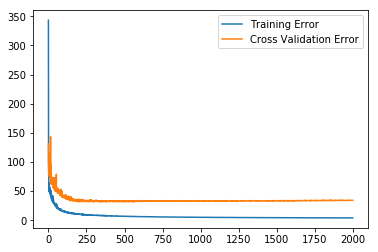

In [17]:
plt.plot(history.history['loss'],label='Training Error')
plt.plot(history.history['val_loss'],label='Cross Validation Error')
plt.legend()
plt.show()

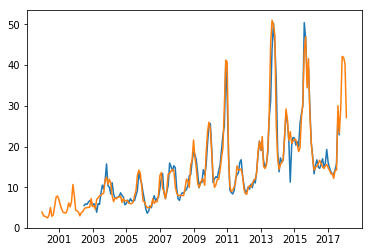

In [18]:
predictions= model_onion.predict(X_onion)
if o!=1:
    plt.plot(date_x('onion')[t:-o+1],predictions[:,0])
else:
    plt.plot(date_x[t:],predictions)
   
plotting('onion')
plt.show()


In [19]:
X= np.array(df['onion'])
x= X[-t:]
print(x.shape)
x.resize((1,30))
print(x.shape)
predictions=model_onion.predict(x)
print(predictions)


(30, 1)
(1, 30)
[[13.382957 20.949165 37.421154 46.588234 49.232098 39.977657]]


In [20]:
model_onion.save('onion.h5')

In [21]:
np.random.seed(8)
X_wheat,Y_wheat= make_dataset('wheat')
train_x,test_x,train_y,test_y= train_test_split(X_wheat,Y_wheat,test_size=0.2)
print(train_x.shape)
print(train_y.shape)

(146, 30)
(146, 6)


In [22]:
np.random.seed(8)
X_wheat,Y_wheat= make_dataset('wheat')
train_x,test_x,train_y,test_y= train_test_split(X_wheat,Y_wheat,test_size=0.2)

model_wheat = Sequential()
model_wheat.add(Dense(t,input_dim=t,activation='linear'))
model_wheat.add(Dense(t*2, activation='relu'))
model_wheat.add(Dense(o, activation='linear'))


optimizer = RMSprop(lr=0.005, rho=0.9, epsilon=1e-08, decay=0.005)
model_wheat.compile(optimizer=optimizer, loss='mean_squared_error', metrics=[det_coeff])
history=model_wheat.fit(train_x, train_y, epochs=100, verbose=2, validation_data=(test_x, test_y))



Train on 146 samples, validate on 37 samples
Epoch 1/100
 - 0s - loss: 294.8783 - det_coeff: -4.4792e+00 - val_loss: 66.2737 - val_det_coeff: -1.9797e-01
Epoch 2/100
 - 0s - loss: 24.7045 - det_coeff: 0.5767 - val_loss: 7.6488 - val_det_coeff: 0.8616
Epoch 3/100
 - 0s - loss: 9.2961 - det_coeff: 0.8360 - val_loss: 6.9489 - val_det_coeff: 0.8645
Epoch 4/100
 - 0s - loss: 10.6198 - det_coeff: 0.8077 - val_loss: 17.6965 - val_det_coeff: 0.6887
Epoch 5/100
 - 0s - loss: 20.1227 - det_coeff: 0.6465 - val_loss: 9.4846 - val_det_coeff: 0.8185
Epoch 6/100
 - 0s - loss: 5.8149 - det_coeff: 0.9015 - val_loss: 8.9059 - val_det_coeff: 0.8393
Epoch 7/100
 - 0s - loss: 21.2366 - det_coeff: 0.6461 - val_loss: 38.4321 - val_det_coeff: 0.2992
Epoch 8/100
 - 0s - loss: 23.9744 - det_coeff: 0.5623 - val_loss: 6.7781 - val_det_coeff: 0.8757
Epoch 9/100
 - 0s - loss: 8.0215 - det_coeff: 0.8650 - val_loss: 11.9436 - val_det_coeff: 0.7854
Epoch 10/100
 - 0s - loss: 13.0407 - det_coeff: 0.7772 - val_loss: 12.

Epoch 85/100
 - 0s - loss: 2.6195 - det_coeff: 0.9525 - val_loss: 5.0526 - val_det_coeff: 0.9050
Epoch 86/100
 - 0s - loss: 3.1257 - det_coeff: 0.9447 - val_loss: 2.2195 - val_det_coeff: 0.9579
Epoch 87/100
 - 0s - loss: 4.6413 - det_coeff: 0.9189 - val_loss: 2.0500 - val_det_coeff: 0.9614
Epoch 88/100
 - 0s - loss: 3.0658 - det_coeff: 0.9490 - val_loss: 3.6492 - val_det_coeff: 0.9321
Epoch 89/100
 - 0s - loss: 4.3478 - det_coeff: 0.9279 - val_loss: 2.0381 - val_det_coeff: 0.9615
Epoch 90/100
 - 0s - loss: 2.4054 - det_coeff: 0.9592 - val_loss: 2.2606 - val_det_coeff: 0.9586
Epoch 91/100
 - 0s - loss: 3.1850 - det_coeff: 0.9460 - val_loss: 2.3420 - val_det_coeff: 0.9560
Epoch 92/100
 - 0s - loss: 3.6178 - det_coeff: 0.9387 - val_loss: 3.1755 - val_det_coeff: 0.9416
Epoch 93/100
 - 0s - loss: 2.6496 - det_coeff: 0.9520 - val_loss: 3.8098 - val_det_coeff: 0.9288
Epoch 94/100
 - 0s - loss: 3.8955 - det_coeff: 0.9315 - val_loss: 2.1219 - val_det_coeff: 0.9593
Epoch 95/100
 - 0s - loss: 2.6

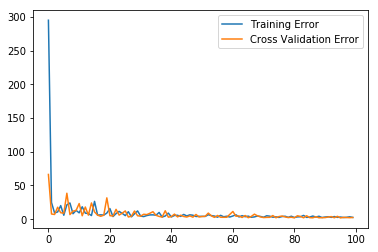

In [23]:
plt.plot(history.history['loss'],label='Training Error')
plt.plot(history.history['val_loss'],label='Cross Validation Error')
plt.legend()
plt.show()

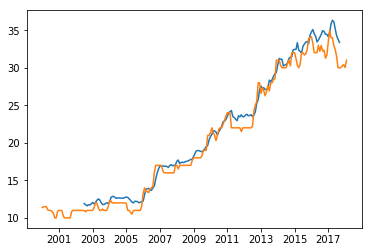

In [24]:
predictions= model_wheat.predict(X_wheat)
if o!=1:
    plt.plot(date_x('wheat')[t:-o+1],predictions[:,0])
else:
    plt.plot(date_x[t:],predictions)
   
plotting('wheat')
plt.show()


In [25]:
X= np.array(df['wheat'])
x= X[-t:]
print(x.shape)
x.resize((1,30))
print(x.shape)
predictions=model_wheat.predict(x)
print(predictions)


(30, 1)
(1, 30)
[[33.975983 34.26008  35.205357 34.030193 35.828617 33.92809 ]]


In [26]:
model_wheat.save('wheat.h5')

In [27]:
np.random.seed(100)
X_chickpeas,Y_chickpeas= make_dataset('chickpeas')
train_x,test_x,train_y,test_y= train_test_split(X_chickpeas,Y_chickpeas,test_size=0.2)
model_chickpeas = Sequential()
model_chickpeas.add(Dense(t,input_dim=t,activation='linear'))
model_chickpeas.add(Dense(t*2, activation='relu'))
model_chickpeas.add(Dense(t*2, activation='relu'))
model_chickpeas.add(Dense(o, activation='linear'))


optimizer = RMSprop(lr=0.01, rho=0.9, epsilon=1e-08, decay=0.05)
model_chickpeas.compile(optimizer=optimizer, loss='mean_squared_error', metrics=[det_coeff])
history=model_chickpeas.fit(train_x, train_y, epochs=300, verbose=2, validation_data=(test_x, test_y))



Train on 146 samples, validate on 37 samples
Epoch 1/300
 - 0s - loss: 1884.0586 - det_coeff: -2.2295e+00 - val_loss: 469.6984 - val_det_coeff: 0.2841
Epoch 2/300
 - 0s - loss: 545.0999 - det_coeff: -8.0956e-02 - val_loss: 276.4596 - val_det_coeff: 0.5786
Epoch 3/300
 - 0s - loss: 193.4924 - det_coeff: 0.6119 - val_loss: 226.2434 - val_det_coeff: 0.6552
Epoch 4/300
 - 0s - loss: 174.3514 - det_coeff: 0.6460 - val_loss: 208.7124 - val_det_coeff: 0.6819
Epoch 5/300
 - 0s - loss: 196.0606 - det_coeff: 0.6290 - val_loss: 184.4047 - val_det_coeff: 0.7190
Epoch 6/300
 - 0s - loss: 163.7183 - det_coeff: 0.6757 - val_loss: 199.0421 - val_det_coeff: 0.6967
Epoch 7/300
 - 0s - loss: 156.3861 - det_coeff: 0.6927 - val_loss: 337.3863 - val_det_coeff: 0.4858
Epoch 8/300
 - 0s - loss: 163.7362 - det_coeff: 0.6848 - val_loss: 202.6373 - val_det_coeff: 0.6911
Epoch 9/300
 - 0s - loss: 152.3346 - det_coeff: 0.7037 - val_loss: 267.7349 - val_det_coeff: 0.5919
Epoch 10/300
 - 0s - loss: 161.7350 - det_co

Epoch 83/300
 - 0s - loss: 60.3216 - det_coeff: 0.8783 - val_loss: 64.8654 - val_det_coeff: 0.9011
Epoch 84/300
 - 0s - loss: 56.3083 - det_coeff: 0.8919 - val_loss: 73.4752 - val_det_coeff: 0.8880
Epoch 85/300
 - 0s - loss: 61.1457 - det_coeff: 0.8764 - val_loss: 79.6959 - val_det_coeff: 0.8785
Epoch 86/300
 - 0s - loss: 57.0059 - det_coeff: 0.8887 - val_loss: 64.3703 - val_det_coeff: 0.9019
Epoch 87/300
 - 0s - loss: 58.5414 - det_coeff: 0.8841 - val_loss: 64.8176 - val_det_coeff: 0.9012
Epoch 88/300
 - 0s - loss: 59.1800 - det_coeff: 0.8807 - val_loss: 64.1716 - val_det_coeff: 0.9022
Epoch 89/300
 - 0s - loss: 54.6796 - det_coeff: 0.8946 - val_loss: 77.0774 - val_det_coeff: 0.8825
Epoch 90/300
 - 0s - loss: 59.4614 - det_coeff: 0.8825 - val_loss: 66.0498 - val_det_coeff: 0.8993
Epoch 91/300
 - 0s - loss: 58.5041 - det_coeff: 0.8871 - val_loss: 66.9351 - val_det_coeff: 0.8980
Epoch 92/300
 - 0s - loss: 53.9514 - det_coeff: 0.8938 - val_loss: 66.2944 - val_det_coeff: 0.8989
Epoch 93/3

 - 0s - loss: 39.9924 - det_coeff: 0.9246 - val_loss: 41.1893 - val_det_coeff: 0.9372
Epoch 166/300
 - 0s - loss: 41.6012 - det_coeff: 0.9219 - val_loss: 41.3297 - val_det_coeff: 0.9370
Epoch 167/300
 - 0s - loss: 39.7062 - det_coeff: 0.9209 - val_loss: 40.3594 - val_det_coeff: 0.9385
Epoch 168/300
 - 0s - loss: 39.3559 - det_coeff: 0.9221 - val_loss: 39.7834 - val_det_coeff: 0.9394
Epoch 169/300
 - 0s - loss: 39.8361 - det_coeff: 0.9215 - val_loss: 50.4986 - val_det_coeff: 0.9230
Epoch 170/300
 - 0s - loss: 39.6363 - det_coeff: 0.9238 - val_loss: 41.5011 - val_det_coeff: 0.9367
Epoch 171/300
 - 0s - loss: 40.0792 - det_coeff: 0.9234 - val_loss: 41.8990 - val_det_coeff: 0.9361
Epoch 172/300
 - 0s - loss: 40.5483 - det_coeff: 0.9207 - val_loss: 44.7112 - val_det_coeff: 0.9318
Epoch 173/300
 - 0s - loss: 39.8951 - det_coeff: 0.9217 - val_loss: 38.3299 - val_det_coeff: 0.9416
Epoch 174/300
 - 0s - loss: 39.4278 - det_coeff: 0.9208 - val_loss: 39.9422 - val_det_coeff: 0.9391
Epoch 175/300


 - 0s - loss: 33.4622 - det_coeff: 0.9345 - val_loss: 30.8836 - val_det_coeff: 0.9529
Epoch 248/300
 - 0s - loss: 34.9783 - det_coeff: 0.9262 - val_loss: 36.9007 - val_det_coeff: 0.9438
Epoch 249/300
 - 0s - loss: 33.2957 - det_coeff: 0.9357 - val_loss: 32.4631 - val_det_coeff: 0.9505
Epoch 250/300
 - 0s - loss: 32.8335 - det_coeff: 0.9322 - val_loss: 32.8464 - val_det_coeff: 0.9499
Epoch 251/300
 - 0s - loss: 33.2257 - det_coeff: 0.9341 - val_loss: 38.5242 - val_det_coeff: 0.9413
Epoch 252/300
 - 0s - loss: 33.5444 - det_coeff: 0.9322 - val_loss: 32.0013 - val_det_coeff: 0.9512
Epoch 253/300
 - 0s - loss: 32.9879 - det_coeff: 0.9378 - val_loss: 32.2302 - val_det_coeff: 0.9509
Epoch 254/300
 - 0s - loss: 32.3770 - det_coeff: 0.9378 - val_loss: 34.1735 - val_det_coeff: 0.9479
Epoch 255/300
 - 0s - loss: 33.0230 - det_coeff: 0.9340 - val_loss: 31.9960 - val_det_coeff: 0.9512
Epoch 256/300
 - 0s - loss: 32.9931 - det_coeff: 0.9377 - val_loss: 34.4416 - val_det_coeff: 0.9475
Epoch 257/300


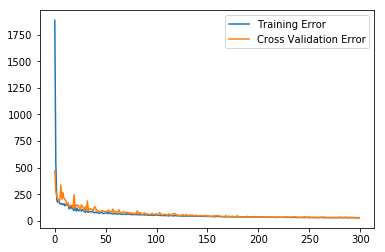

In [28]:
plt.plot(history.history['loss'],label='Training Error')
plt.plot(history.history['val_loss'],label='Cross Validation Error')
plt.legend()
plt.show()

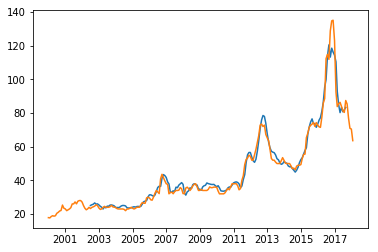

In [29]:
predictions= model_chickpeas.predict(X_chickpeas)
if o!=1:
    plt.plot(date_x('chickpeas')[t:-o+1],predictions[:,0])
else:
    plt.plot(date_x[t:],predictions)
   
plotting('chickpeas')
plt.show()


In [30]:
X= np.array(df['chickpeas'])
x= X[-t:]
print(x.shape)
x.resize((1,30))
print(x.shape)
predictions=model_chickpeas.predict(x)
print(predictions)


(30, 1)
(1, 30)
[[57.663315 68.92527  56.302814 52.644703 58.13746  67.40623 ]]


In [31]:
model_chickpeas.save('chickpeas.h5')